# Bioinfo Project 2023

In [142]:
#includes
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics
import glob
import re
from prettytable import PrettyTable
import seaborn as sns


from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

# Step 1 - Data Preprocessing

## Gather RNA counts

To analyze the samples, you will need to merge them into a single Python object. One standard way to do this is to build a dataframe (or any "table like" struture) such as each row is "sample" and each column is a "gene". Make sure to test your dataset, so that if you change something later on, errors can be catch easily.

In [143]:
#Dataframe lines: customers, columns: genes
class SampleMerger:
    def __init__(self):          #constructor
        self.sample_files = None #files names
        self.df = None           #dataframe
    
    def __str__(self):           # print with str format
        if self.df is None:
            self.merge_samples()
        return str(self.df)
    
    #Getters
    def get_sample_files(self): 
        if self.sample_files is None:
            self.set_sample_files()
        return self.sample_files
    
    def get_df(self):            
        if self.df is None:
            self.merge_samples()
        return self.df
    
    def get_sub_dataframe(self, columns):
        if self.df is None:
            self.merge_samples()
        sub_df = self.df.loc[:, columns]
        return sub_df 
    
    #Setters
    def set_sample_files(self):  #load files names
        txt_files = []
        folder_path = '../Data/'

        for file_name in os.listdir(folder_path):
            if file_name.endswith('.txt'):
                txt_files.append(os.path.join(folder_path, file_name))
        self.sample_files = txt_files
    
    def merge_samples(self): #Create the dataframe
        count = 0
        i = 0
        j = -1
        gene_list = []
        nb_gene_list = [ [ None for y in range( len(self.sample_files) ) ]for x in range( 28953 ) ]
        
        for file in self.sample_files:
            j += 1
            with open(file) as fasta_file:
                for line in fasta_file:
                    line = line.strip()
                    if not(line.startswith("g")):
                        gene = line.split("\t")[0]
                        nb_gene = line.split("\t")[1]
                        if (count == 0):
                            gene_list.append(gene)
                        nb_gene_list[i][j] = int(nb_gene)
                        i += 1
            count = 1
            i = 0
        dictionnary = dict()
        for i in range (0, 28953):
            dictionnary[gene_list[i]] = nb_gene_list[i]
        self.df = pd.DataFrame(dictionnary)
        
        names = []
        for item in self.sample_files:
            name = item.split('/')[-1].split('.')[0]
            names.append(name)
        self.df.index = names
        
    #Step 2
    
    #Gen part
    
    def get_gen_mean_dict(self):
        """
        df: dataframe
        return the mean for each gene as a dictionary {key: gene; value: mean}
        """
        mean_dict = dict()
        for col in self.df.columns:
            mean_dict[col] = self.df[col].mean()
        return mean_dict

    def get_gen_median_dict(self):
        """
        df: dataframe
        return the median for each gene as a dictionary {key: gene; value: median}
        """
        median_dict = dict()
        for col in self.df.columns:
            median_dict[col] = self.df[col].median()
        return median_dict

    def get_gen_stdev_dict(self):
        """
        df: dataframe
        return the standard deviation for each gene as a dictionary {key: gene; value: standard deviation}
        """
        stdev_dict = dict()
        for col in self.df.columns:
            stdev_dict[col] = self.df[col].std()
        return stdev_dict    
    
    def plot_gen_mean(self):
        gene_means = dict(self.get_gen_mean_dict()).values()
        plt.figure(figsize=(20,6))
        plt.xlabel('Gene')
        plt.ylabel('Mean')
        plt.plot(gene_means)
        plt.title('Mean for each gene')
        
    def plot_gen_median(self):
        gene_means = dict(self.get_gen_median_dict()).values()
        plt.figure(figsize=(20,6))
        plt.xlabel('Gene')
        plt.ylabel('Median')
        plt.plot(gene_means)
        plt.title('Median for each gene')
    
    def plot_gen_std(self):   
        gene_means = dict(self.get_gen_stdev_dict()).values()
        plt.figure(figsize=(20,6))
        plt.xlabel('Gene')
        plt.ylabel('Standard Deviation')
        plt.plot(gene_means)
        plt.title('Standard deviation for each gene')
        
        
    #Sample part 
    
    def get_sample_mean_dict(self):
        """
        df: dataframe
        return the mean for each sample as a dictionary {key: gene; value: mean}
        """
        
        mean_dict = dict()
        row_means = self.df.mean(axis=1)
        for index, value in row_means.items():
            mean_dict[index] = value
        return mean_dict
        

    def get_sample_median_dict(self):
        """
        df: dataframe
        return the median for each sample as a dictionary {key: gene; value: median}
        """
        median_dict = dict()
        row_medians = self.df.median(axis=1)
        for index, value in row_medians.items():
            median_dict[index] = value
        return median_dict

    def get_sample_stdev_dict(self):
        """
        df: dataframe
        return the standard deviation for each sample as a dictionary {key: gene; value: standard deviation}
        """
        std_dict = dict()
        row_stds = self.df.std(axis=1)
        for index, value in row_stds.items():
            std_dict[index] = value
        return std_dict 
    
    def plot_sample_mean(self):
        gene_means = dict(self.get_sample_mean_dict()).values()
        plt.figure(figsize=(20,6))
        plt.xlabel('Sample')
        plt.ylabel('Mean')
        plt.plot(gene_means)
        plt.title("Samples mean")
        
    def plot_sample_median(self):
        gene_median = dict(self.get_sample_median_dict()).values()
        plt.figure(figsize=(20,6))
        plt.xlabel('Sample')
        plt.ylabel('Median')
        plt.plot(gene_median)
        plt.title("Samples median")    
    
    def plot_sample_std(self):   
        gene_std = dict(self.get_gen_stdev_dict()).values()
        plt.figure(figsize=(20,6))
        plt.xlabel('Sample')
        plt.ylabel('Standard Deviation')
        plt.plot(gene_std)
        plt.title("Samples standard deviation")
        

    #Variation Coefficientpart
    
    def get_gen_cv_dict(self):
        """
        df: dataframe
        return cv for each gene as a dictionary {key: gene; value: variation coefficient}
        """
        cv_dict = dict()
        for col in self.df.columns:
            cv_dict[col] = self.df[col].std()//self.df[col].median()
        return cv_dict   
    
    def plot_gen_cv(self):   
        gene_cv = dict(self.get_gen_cv_dict()).values()
        plt.figure(figsize=(20,6))
        plt.xlabel('Gene')
        plt.ylabel('Coefficient de Variation')
        plt.plot(gene_cv)
    
    def test_data(self): #tests
        if self.df is None:
            self.merge_samples()
        assert self.df.isnull().sum().sum() == 0, "There are missing values in the merged dataframe."
        assert isinstance(self.df, pd.DataFrame), "The merged object is not a dataframe."
        return True

In [144]:
Frame = SampleMerger()
Frame.set_sample_files()
Frame.merge_samples()


In [145]:
Frame.test_data()

True

In [146]:
Frame.get_df()

,"""A1BG""","""A1BG-AS1""","""A1CF""","""A2M""","""A2M-AS1""","""A2ML1""","""A2MP1""","""A3GALT2""","""A4GALT""","""A4GNT""",...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533311_CGND-HRA-00350_counts,27,89,0,1627,85,162,3,0,8,0,...,727,1414,1479,724,89,421,84,410,1199,1462
GSM3533394_CGND-HRA-01236_counts,62,175,0,3614,94,128,3,3,143,0,...,727,1863,1723,966,79,527,94,432,1679,1919
GSM3533310_CGND-HRA-00338_counts,29,88,0,1171,86,105,3,2,37,1,...,809,1790,1590,764,93,435,125,350,1579,1871
GSM3533352_CGND-HRA-00546_counts,16,133,0,1366,84,200,4,3,31,1,...,851,1738,1632,903,82,439,94,423,1704,1780
GSM3533279_CGND-HRA-00226_counts,38,83,0,2391,121,143,6,2,15,1,...,1095,2267,2122,1078,128,555,106,522,2087,2432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533344_CGND-HRA-00436_counts,17,43,4,900,73,113,1,2,6,1,...,727,1561,1372,702,83,350,99,351,1256,1479
GSM3533334_CGND-HRA-00409_counts,48,127,0,1635,105,226,1,1,24,0,...,465,1006,1087,519,48,329,86,277,789,905
GSM3533391_CGND-HRA-01219_counts,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
GSM3533263_CGND-HRA-00209_counts,30,63,0,1024,34,56,1,0,9,0,...,288,640,644,352,30,179,46,136,614,723


## Gather sample annotations

The sample annotations are all placed in a unique "xml" file. First, open the file with any text editor, and try to understand its architecture. Then, identify the information that could be relevant for your analysis.

Finally, create a dataframe (or any "table like" structure) such as each row is a samples and each column an annotation. Make sur to test your dataset (gene counts+annotations) so that you can catch any error in the next steps.

In [147]:
class SampleAnnotation:
    def __init__(self):          #constructor
        self.df = None           #dataframe
        
    def get_df(self):
        return self.df  
    
    def collect_annotations(self):
        # Reading the XML file
        url = '{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}'
        tree = ET.parse('../Data/GSE124439_family.xml')
        root = tree.getroot()
        #samples = root.findall(url+"Sample")
        #print(samples)

        # List to store annotation data

        data_list = []

        # Loop to loop through samples and extract other annotations

        for sample in root.findall(url+'Sample'):

            #Sample ID retrieval

            #print(sample)
            sample_id = sample.get('iid')


            # Recovery of annotations

            annotations = {}
            for i in sample.findall(url+'Channel'):
                #print(i)
                for charac in i.findall(url+'Characteristics'):


                    if charac.get('tag') in ['cns subregion', 'subject id', 'sample group']:

                        annotations[charac.get('tag')] = charac.text.strip()

            # Add data to list

            data = {'sample_id': sample_id, **annotations}
            data_list.append(data)

        # Creating the DataFrame from the data

        self.df = pd.DataFrame(data_list)  
    
    def represent_sample_groups(self):
        counts = self.df['sample group'].value_counts(normalize=True) * 100

        # Créer un diagramme camembert
        plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['red', 'blue', 'green'])
        plt.title('Répartition des sujets par catégorie')
        plt.show()

    def represent_cns_subregion(self):
        counts = self.df['cns subregion'].value_counts(normalize=True) * 100

        # Créer un diagramme camembert
        plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow'])
        plt.title('Répartition des sujets par catégorie')
        plt.show()

    def __str__(self):
        if self.df is None:
            self.collect_annotations()
            
        return str(self.df)
    
    def get_sub_dataframe(self, columns):
        if self.df is None:
            self.merge_samples()
        sub_df = self.df.loc[:, columns]
        return sub_df 

In [148]:
Annotations = SampleAnnotation()
Annotations.collect_annotations()
Annotations.df.head()

,sample_id,cns subregion,subject id,sample group
0,GSM3533230,Frontal Cortex,NEUEL133AK6,ALS Spectrum MND
1,GSM3533231,Frontal Cortex,NEUYV496XLP,ALS Spectrum MND
2,GSM3533232,Frontal Cortex,NEUZU200WEQ,ALS Spectrum MND
3,GSM3533233,Frontal Cortex,NEUME287RK2,ALS Spectrum MND
4,GSM3533234,Frontal Cortex,NEUEC006FND,ALS Spectrum MND


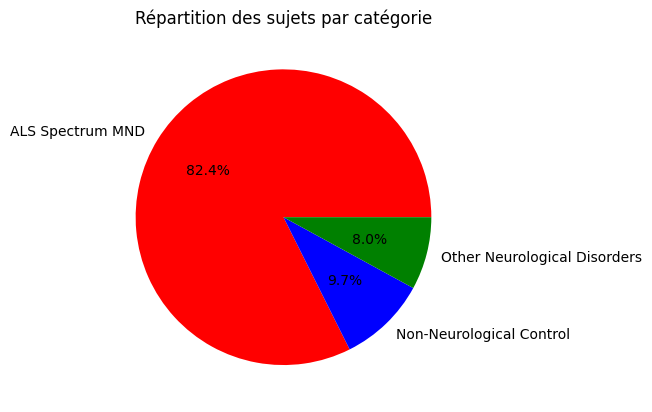

In [149]:
Annotations.represent_sample_groups()

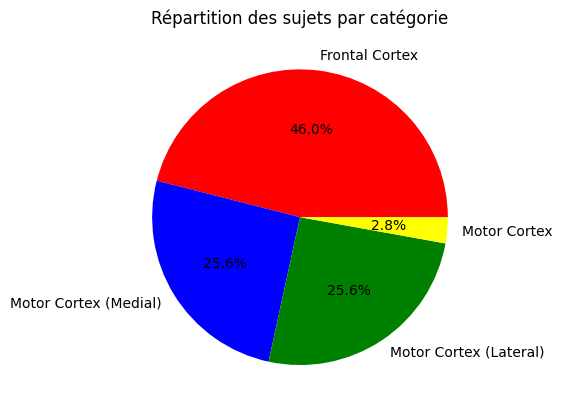

In [150]:
Annotations.represent_cns_subregion()

# Step 2 - Descriptive analysis

## RNA counts description:

For each gene, compute the mean, the median and the standard deviation

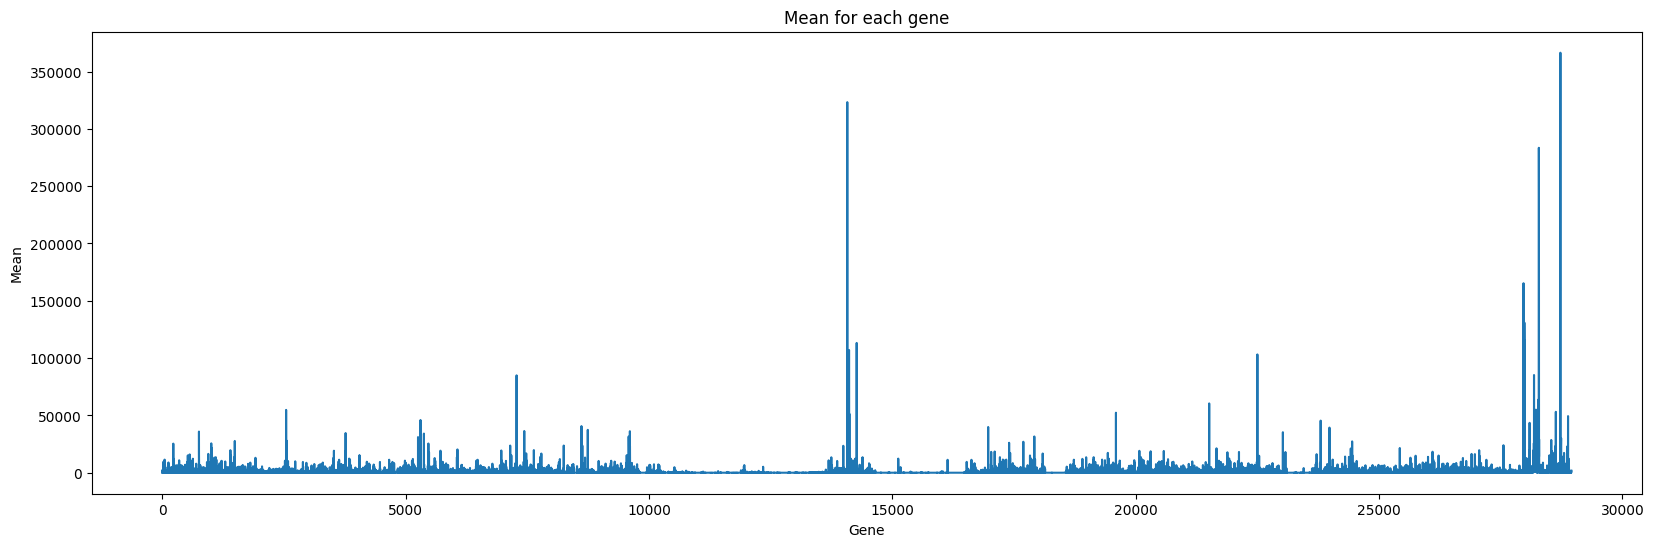

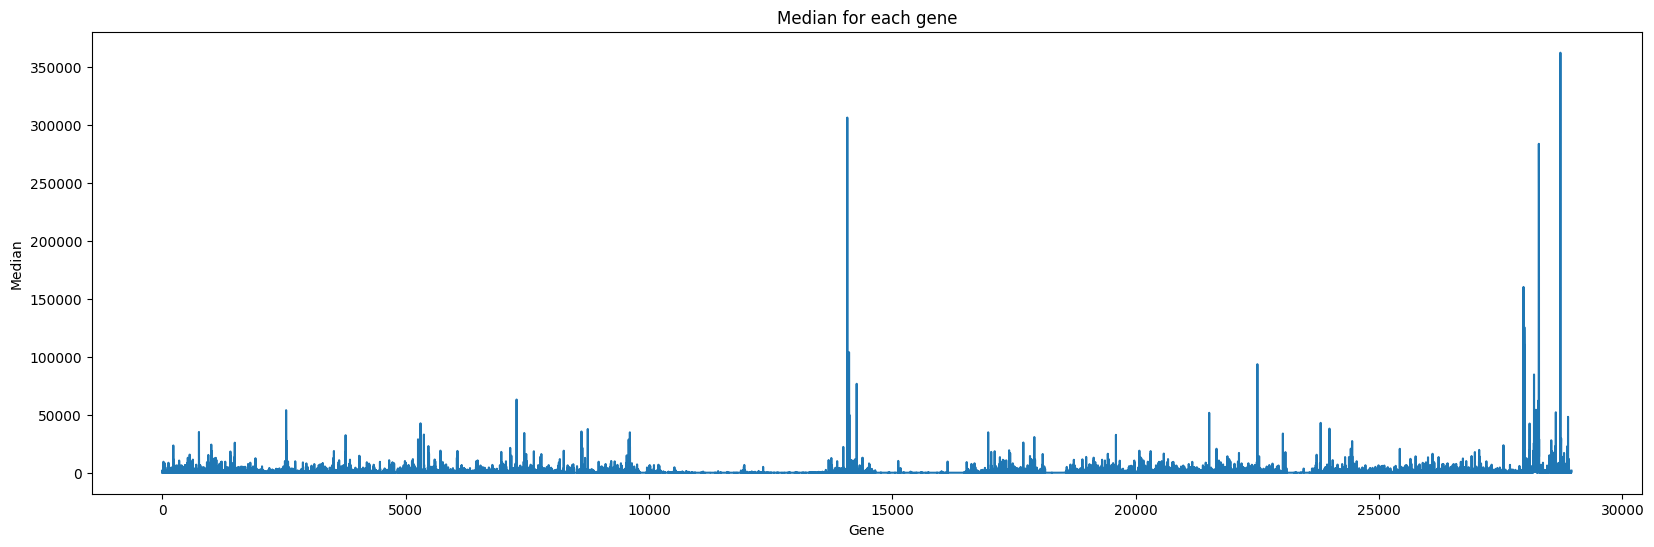

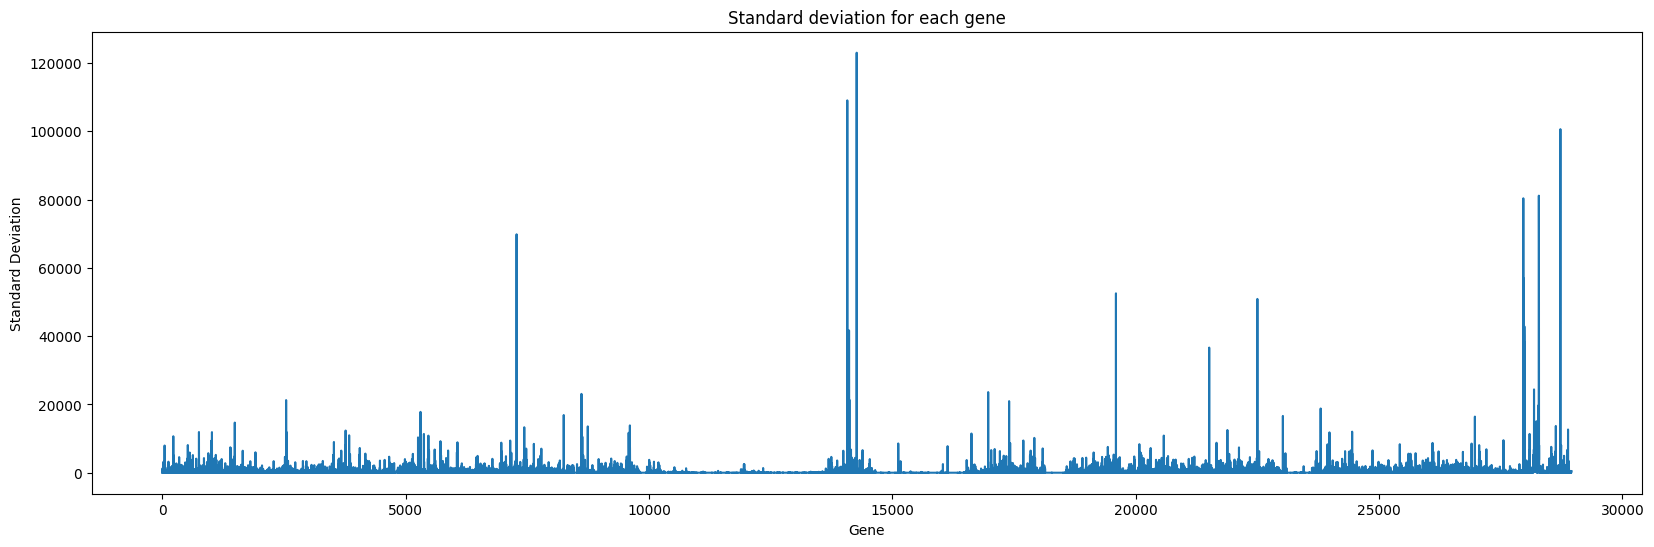

In [151]:
Frame.plot_gen_mean()
Frame.plot_gen_median()
Frame.plot_gen_std()


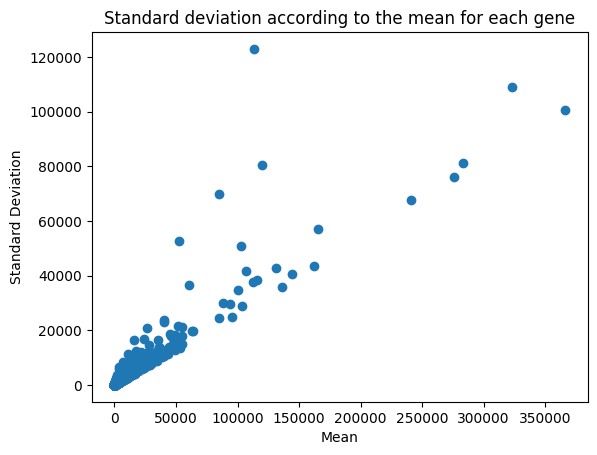

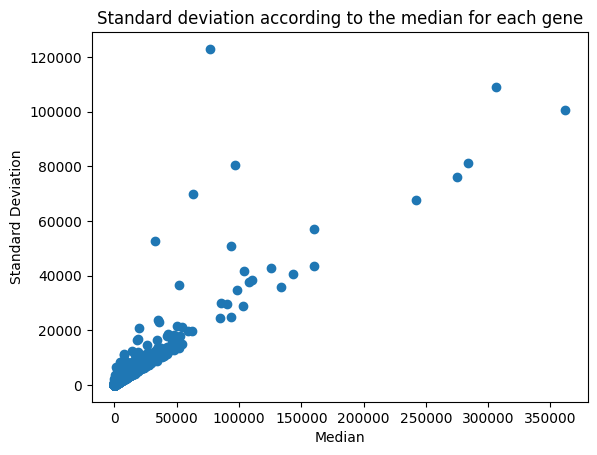

In [152]:
#Representing standard deviation according to the mean and median (for genes)

gen_mean_dict = Frame.get_gen_mean_dict()
gen_median_dict = Frame.get_gen_median_dict()
gen_stdev_dict = Frame.get_gen_stdev_dict()

plt.scatter(x = gen_mean_dict.values(), y = gen_stdev_dict.values())
plt.title("Standard deviation according to the mean for each gene")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.show()

plt.scatter(x = gen_median_dict.values(), y = gen_stdev_dict.values())
plt.title("Standard deviation according to the median for each gene")
plt.xlabel("Median")
plt.ylabel("Standard Deviation")
plt.show()

In [160]:
# Representing Variation Coefficient

## Samples description:

For each sample, compute the mean (across all genes), the median, the standard deviation. Find a way to efficiently report all those data. As for the RNA counts, think about which subsets you can analyse.



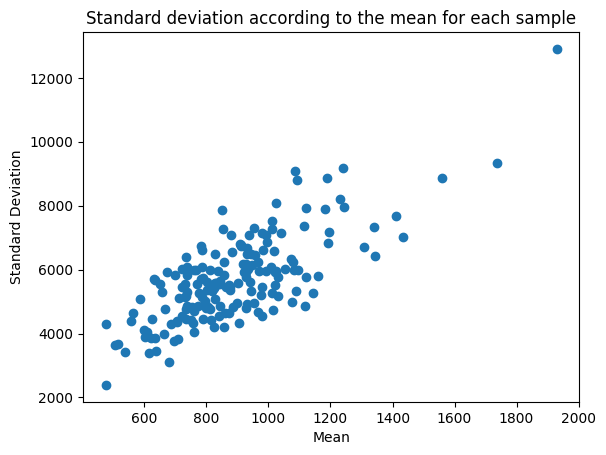

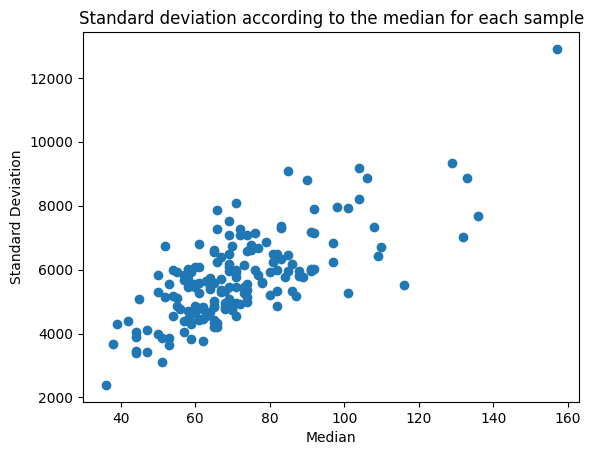

In [161]:
#Representing standard deviation according to the mean and median (for samples)

sam_mean_dict = Frame.get_sample_mean_dict()
sam_median_dict = Frame.get_sample_median_dict()
sam_stdev_dict = Frame.get_sample_stdev_dict()

plt.scatter(x = sam_mean_dict.values(), y = sam_stdev_dict.values())
plt.title("Standard deviation according to the mean for each sample")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.show()

plt.scatter(x = sam_median_dict.values(), y = sam_stdev_dict.values())
plt.title("Standard deviation according to the median for each sample")
plt.xlabel("Median")
plt.ylabel("Standard Deviation")
plt.show()

# Step 3: PCA

As you may have observed, the number of genes is far too high to compare all samples using all genes with simple analyses. The PCA is a classical first step analysis in those cases, and offers (among other things) a good way to visualize your data. To understand what a PCA is, let's check at my favorite youtube channel: StatQuest: PCA Step-by-Step. We will review the video together, wait for me please.

To implement a PCA in python, a simple way is to use the PCA function in the sklearn.decomposition package. Scikit-learn is a wonderfull Python library, and contains a lot of "must-have" features needed for a data-scientist. Take some time to visite the official website. For a pratical python PCA tutorial, let's check again a Josh Starmer's video.

Now, perform a PCA and plot the samples using their coordinates in the first PCs. TIPs: to select the good number of PCs, compute the percenatage of variance their capture. Use the annotations to color your plots, and see if you can already observe some kind of signal.

PCA is also good way to find outliers. Outliers are samples that are greatly different from the other samples. The difference should be "huge", so that only experimental errors could explain it. Using the PCA and visualization, look at possible outliers.



Hello World!


Index(['"A1BG"', '"A1BG-AS1"', '"A1CF"', '"A2M"', '"A2M-AS1"', '"A2ML1"',
       '"A2MP1"', '"A3GALT2"', '"A4GALT"', '"A4GNT"',
       ...
       'X6B_LINE:CR1:LINE', 'X7A_LINE:CR1:LINE', 'X7B_LINE:CR1:LINE',
       'X7C_LINE:CR1:LINE', 'X7D_LINE:CR1:LINE', 'X8_LINE:CR1:LINE',
       'X9_LINE:L1:LINE', 'Zaphod2:hAT-Tip100:DNA', 'Zaphod3:hAT-Tip100:DNA',
       'Zaphod:hAT-Tip100:DNA'],
      dtype='object', length=28953)